In [13]:
'''
CS 498: Mini Project 1
Authors: Rongqi Gao, Yilin Zhu, Jiashuo Tong
'''

# Task 0, Question 1
import csv
import pandas as pd

df1 = pd.read_csv('mp1_av_totalmiles.csv')
df2 = pd.read_csv('mp1_av_disengagements.csv')

print("Answer for Task 0, Question 1: \n")
print("A brief view of the datasets are displayed below. \n")
print("mp1_av_totalmiles.csv: ")
display(df1.head(2))
print("mp1_av_disengagements.csv: ")
display(df2.head(2))

Answer for Task 0, Question 1: 

A brief view of the datasets are displayed below. 

mp1_av_totalmiles.csv: 


,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128


mp1_av_disengagements.csv: 


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions


In [14]:
# Task 0, Question 2
total_num_disengagements = df1['total number of disengagements'].sum()
num_unique_months = len(df1['Month'].unique())
lst_unique_locations = df2['Location'].unique()
num_unique_causes = len(df2['Cause'].unique())
df1_missing_values = df1.isnull().sum(axis=0) # the first dataset has no missing values
df2_missing_values = df2.isnull().sum(axis=0) # the second dataset does have missing values
missing_index= df2.columns[df2_missing_values.to_numpy().nonzero()][0] # find the index with missing values
num_missing_values = df2_missing_values[missing_index] # find the number of missing values at the index

print("Answer for Task 0, Question 2: \n")
print("a. Total number of AV disengagements is ", total_num_disengagements, "\n", "-"*60)
print("b. Number of unique months that have recorded AV disengagements is ", num_unique_months, "\n", "-"*60)
print("c. List of unique locations of AV disengagements: ", lst_unique_locations, "\n", "-"*60)
print("d. Number of unique causes for AV disengagements is ", num_unique_causes, "\n", "-"*60)
print("e. The first dataset, mp1_av_totalmiles.csv, has no missing values")
print("   The second dataset, mp1_av_disengagements has", num_missing_values, \
      "missing values for the column of", missing_index)

Answer for Task 0, Question 2: 

a. Total number of AV disengagements is  1024 
 ------------------------------------------------------------
b. Number of unique months that have recorded AV disengagements is  15 
 ------------------------------------------------------------
c. List of unique locations of AV disengagements:  ['urban-street' 'highway'] 
 ------------------------------------------------------------
d. Number of unique causes for AV disengagements is  10 
 ------------------------------------------------------------
e. The first dataset, mp1_av_totalmiles.csv, has no missing values
   The second dataset, mp1_av_disengagements has 532 missing values for the column of ReactionTime


Answer for Task 0, Question 3: 

The top 2 causes of disengagments are Unwanted Driver Discomfort and Recklessly behaving agent
*******************Run the cell twice to show pie chart*******************


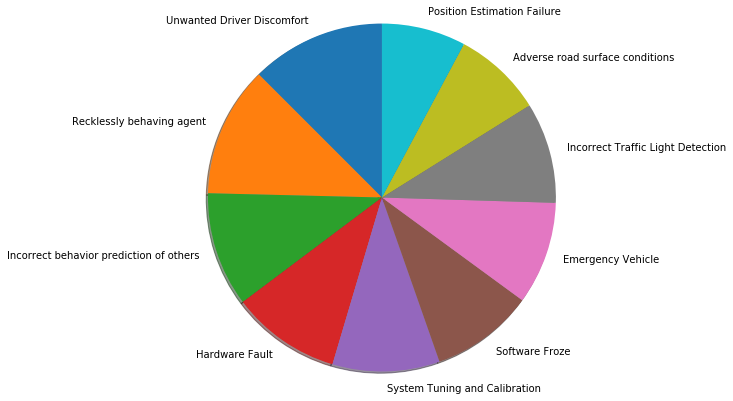

In [15]:
# Task 0, Question 3 
import matplotlib.pyplot as plt
summary_causes = df2['Cause'].value_counts()
top2_causes = summary_causes.head(2).index.tolist()
print("Answer for Task 0, Question 3: \n")
print("The top 2 causes of disengagments are", ' and '.join(top2_causes))
print("*******************Run the cell twice to show pie chart*******************")
labels = summary_causes.index
fig1, ax1 = plt.subplots()
ax1.pie(summary_causes, labels=labels,shadow=True, startangle=90, radius=2)
plt.show()
#pie_chart_causes = summary_causes.plot.pie(figsize=(8,8))

Answer for Task 0, Question 4: 

Number of disengagements per mile is decreasing over time, which implies that the AV technology is maturing.


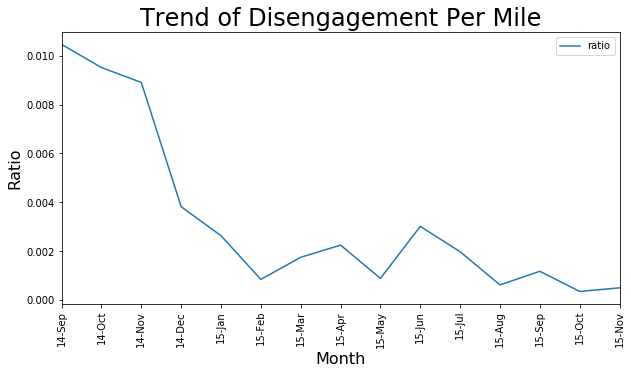

In [40]:
# Task 0, Question 4
import matplotlib.pyplot as plt
trend = df1[['Month','total number of disengagements','miles driven in autonomous mode']][:-2];
trend['ratio'] = trend['total number of disengagements'] / trend['miles driven in autonomous mode'];
trend.plot(x ='Month', y='ratio', kind = 'line', figsize=(10,5));
plt.xticks(trend.index, trend['Month'], rotation=90);
plt.title("Trend of Disengagement Per Mile", fontsize=24);
plt.xlabel("Month", fontsize=16);
plt.ylabel("Ratio", fontsize=16);
print("Answer for Task 0, Question 4: \n")
print("Number of disengagements per mile is decreasing over time, which implies that the AV technology is maturing.")

In [17]:
# Task 1, Question 1
print("Answer for Task 1, Question 1: \n")
print("1. The Gaussian Distribution is a bell-shaped curve. It tells us the mean and standard deviation of a dataset.\n")
print("2. The Exponential Distribution is a monotonically-decreasing concave-up curve. Once the distribution is fit to data, its rate parameter (λ) will describe the decaying rate of data.\n")
print("3. The Weibull Distribution has the shape parameter which controls the shape of the curve, and the scale parameter which controls how much the distribution spreads out. The existence of a shape parameter implies that the distribution can be used to fit a broader range of datasets. \n")

Answer for Task 1, Question 1: 

1. The Gaussian Distribution is a bell-shaped curve. It tells us the mean and standard deviation of a dataset.

2. The Exponential Distribution is a monotonically-decreasing concave-up curve. Once the distribution is fit to data, its rate parameter (λ) will describe the decaying rate of data.

3. The Weibull Distribution has the shape parameter which controls the shape of the curve, and the scale parameter which controls how much the distribution spreads out. The existence of a shape parameter implies that the distribution can be used to fit a broader range of datasets. 



Answer for Task 1, Question 2: 

The probability distribution of reation times fits exponential distribution very well, which signifies that the probability of a specific reaction time decays fast with increasing reaction times.


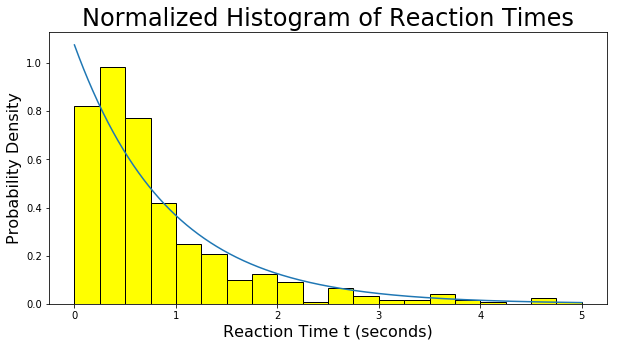

In [53]:
# Task 1, Question 2
print("Answer for Task 1, Question 2: \n")
import numpy as np
import scipy.stats as st
from scipy.stats import norm, expon, weibull_min
fig2, ax2 = plt.subplots(figsize=(10,5))

reaction_time_data = df2['ReactionTime'].dropna()

ax2.hist(reaction_time_data, color = 'yellow', edgecolor = 'black', density=True, bins = 20, range=(0,5));
plt.title('Normalized Histogram of Reaction Times', fontsize=24)
plt.xlabel('Reaction Time t (seconds)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)

loc, scale = st.expon.fit(reaction_time_data)
x = np.linspace(0,5,1000)
y = st.expon.pdf(x,loc,scale)

plt.plot(x,y)
print("The probability distribution of reation times fits exponential distribution very well, which signifies that the probability of a specific reaction time decays fast with increasing reaction times.")


#plt.hist(df2['ReactionTime'], color = 'yellow', edgecolor = 'black', bins = 30, figsize=(5,10))

In [19]:
# Task 1, Question 3
print("Answer for Task 1, Question 3: \n")
avg_overall = df2.ReactionTime.mean()
avg_location = df2.groupby("Location")["ReactionTime"].mean()
print("Answer for Task 1, Question 3: \n")
print("The average reaction time for all locations is ", avg_overall, "seconds")
print("The average reaction time for high ways is ", avg_location[0], "seconds, while for Urbana streets, it is", avg_location[1], "seconds.")

Answer for Task 1, Question 3: 

Answer for Task 1, Question 3: 

The average reaction time for all locations is  0.9297703252032526 seconds
The average reaction time for high ways is  1.48 seconds, while for Urbana streets, it is 0.9286496945010189 seconds.


In [20]:
# Task 1, Question 4
print("Answer for Task 1, Question 4: \n")
react_manual = df2.ReactionTime[df2.TypeOfTrigger == "manual"]
z_score = (react_manual.mean()- 1.09)/ react_manual.std()

Answer for Task 1, Question 4: 



Answer for Task 1, Question 5: 



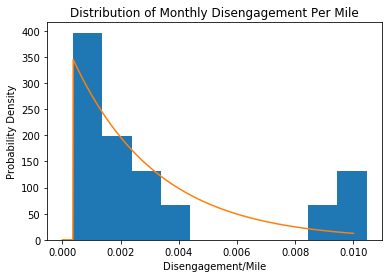

In [54]:
# Task 1, Question 5
print("Answer for Task 1, Question 5: \n")
trend.ratio.plot(kind = "hist", density = True)
loc_q5, scale_q5 = st.expon.fit(trend.ratio)
x_q5 = np.linspace(0.0,0.01,1000)
y_q5 = st.expon.pdf(x_q5,loc_q5,scale_q5)
plt.plot(x_q5,y_q5)
plt.title("Distribution of Monthly Disengagement Per Mile")
plt.xlabel("Disengagement/Mile")
plt.ylabel("Probability Density")
plt.show()

In [26]:
# Task 2, Question 1
df_merge = pd.merge(left = df1, right = df2, on = ["Month", "Car"])
display(df_merge.head(2))
df_clear = df_merge[df_merge.Weather == "clear"]
df_cloudy = df_merge[df_merge.Weather == "cloudy"]
P_dis_clear = df_clear.Weather.count()/(df1["miles driven in autonomous mode"].sum() * 0.72)
P_dis_cloudy = df_cloudy.Weather.count()/(df1["miles driven in autonomous mode"].sum() * 0.28)
P_dis_given_clear = P_dis_clear/ 0.72
P_dis_given_cloudy = P_dis_cloudy/ 0.28

P_dis_auto_clear = df_clear[df_clear.TypeOfTrigger == "automatic"].Weather.count()/ (df1["miles driven in autonomous mode"].sum() * 0.72)
P_dis_auto_cloudy = df_cloudy[df_cloudy.TypeOfTrigger == "automatic"].Weather.count()/ (df1["miles driven in autonomous mode"].sum() * 0.28)
P_dis_auto_given_clear = P_dis_auto_clear/ 0.72
P_dis_auto_given_cloudy = P_dis_auto_cloudy/ 0.28

# For Question(e), we will use normal distribution to approximate the binomial distribution B(12000, p_a_given_cloudy)
# The number of disengagements should approximately follows N(12000*p_a_given_cloudy, sqrt(12000*p_a_given_cloudy*(1-p_a_given_cloudy)))
mean = 12000 * P_dis_given_cloudy
from scipy.stats import poisson, norm
prob = 1 - poisson.cdf(150, mean)

print("Answer for Task 2, Question 1: \n")
print("Answer for Question a: Bernoulli distribution(either one disengagement or zero in a mile)")
print("Answer for Question b: The probability is ", P_dis_given_cloudy)
print("Answer for Question c: The probability is ", P_dis_given_clear)
print("Answer for Question d: Given the cloudy day, the probability is ", P_dis_auto_given_cloudy, "; Given the clear day, the probability is ", P_dis_auto_given_clear)
print("Answer for Question e: The probability that there are 150 or more disengagements under cloudy conditions is ", prob)

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,4207,44,24,20,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,4207,44,24,20,urban-street,cloudy,automatic,0.66,Adverse road surface conditions


Answer for Task 2, Question 1: 

Answer for Question a: Bernoulli distribution(either one disengagement or zero in a mile)
Answer for Question b: The probability is  0.021080559912597316
Answer for Question c: The probability is  0.0007216199650719443
Answer for Question d: Given the cloudy day, the probability is  0.010022733275809744 ; Given the clear day, the probability is  0.00036653712511590825
Answer for Question e: The probability that there are 150 or more disengagements under cloudy conditions is  0.9999999999983208


In [27]:
# Task 2, Question 2
print("Answer for Task 2, Question 2: \n")
print("It represents that the z-score follows normal distribution and we should calculate the p-value under the normal distribution \n")
print("Yes, because the alternative hypothesis should be the opposite of the null hypothesis. Rejecting null hypothesis is equivalent to accepting alternative hypothesis.")

Answer for Task 2, Question 2: 

It represents that the z-score follows normal distribution and we should calculate the p-value under the normal distribution 

Yes, because the alternative hypothesis should be the opposite of the null hypothesis. Rejecting null hypothesis is equivalent to accepting alternative hypothesis.


In [28]:
# Task 2, Question 3
dis_clear = df_merge.groupby("Weather").Weather.count()[0]
dis_cloudy = df_merge.groupby("Weather").Weather.count()[1]
miles_clear = df1["miles driven in autonomous mode"].sum() * 0.72
miles_cloudy = df1["miles driven in autonomous mode"].sum() * 0.28
prop_clear = dis_clear/ miles_clear
prop_cloudy = dis_cloudy/ miles_cloudy
p_hat = (dis_clear + dis_cloudy)/ (miles_clear + miles_cloudy)
q_hat = 1 - p_hat

z_score = (prop_cloudy - prop_clear)/ ((p_hat * q_hat * (1/ miles_clear + 1/ miles_cloudy)) ** 0.5)
print(z_score)
p_value = 2 * (1 - norm.cdf(z_score, 0, 1))
print("Answer for Task 2, Question 3: \n")
print("The null hypothesis for this test is: The AV has the same disengagements(per mile) on cloudy days and clear days")
print("The alternative hypothesis is: The AV has the different disengagements(per mile) on cloudy days  clear days")
print("The p-value for this test is: ", p_value, "< 0.05")
print("Therefore, we could reject the null hypothesis.")
print("Furthermore, the mean disengagements per mile on cloudy days is ", prop_cloudy, "larger than the one on clear days, which is ", prop_clear)
print("Hence we could conclude that the AV has more disengagements(per mile) on cloudy days than clear days")

38.1986243877602
Answer for Task 2, Question 3: 

The null hypothesis for this test is: The AV has the same disengagements(per mile) on cloudy days and clear days
The alternative hypothesis is: The AV has the different disengagements(per mile) on cloudy days  clear days
The p-value for this test is:  0.0 < 0.05
Therefore, we could reject the null hypothesis.
Furthermore, the mean disengagements per mile on cloudy days is  0.005902556775527249 larger than the one on clear days, which is  0.0005195663748517998
Hence we could conclude that the AV has more disengagements(per mile) on cloudy days than clear days


In [29]:
# Task 2, Question 4
df_sub1 = df_merge[(df_merge.Weather == "cloudy") & (df_merge.TypeOfTrigger == "automatic")]
df_sub2 = df_merge[(df_merge.Weather == "clear") & (df_merge.TypeOfTrigger == "automatic")]
P_1 = df_sub1[df_sub1.ReactionTime > 0.6].ReactionTime.count()/ df_sub1.ReactionTime.count()
P_2 = df_sub2[df_sub2.ReactionTime > 0.9].ReactionTime.count()/ df_sub2.ReactionTime.count()
print("Answer for Task 2, Question 4: \n")
print("The conditional probability that the reaction time is greater than 0.6s given that the weather was cloudy and the disengagement type is automatic is: ", P_1)
print("The conditional probability that the reaction time is greater than 0.9s given that the weather was clear and the disengagement type is automatic is: ", P_2)

Answer for Task 2, Question 4: 

The conditional probability that the reaction time is greater than 0.6s given that the weather was cloudy and the disengagement type is automatic is:  0.4759493670886076
The conditional probability that the reaction time is greater than 0.9s given that the weather was clear and the disengagement type is automatic is:  0.28125


In [ ]:
# Task 2, Question 5
# The target is to calculate probability of accident per mile given there is an automatic AV disengagement
# Let A denotes the event "there is an accident in a mile", C denotes the event "there is an automatic AV disengagement in that mile."
# Suppose B_1 donotes the cloudy weather, and B_2 denotes the clear weather. Therefore, we have
# P(A|C) = P(A,C)/ P(C) = [P(A,C|B_1) + P(A,C|B_2)]/[P(C|B_1) + P(C|B_2)]
# Also we have, according to chain rule, P(A, C|B_i) = p(A|C, B_i) * p(C|B_i), where i = 1, 2
P_A_given_C_B1 = P_1
P_A_given_C_B2 = P_2
P_C_given_B1 = P_a_auto_given_cloudy
P_C_given_B2 = P_a_auto_given_clear
P_A_given_C = (P_A_given_C_B1 * P_C_given_B1 + P_A_given_C_B2 * P_C_given_B2)/ (P_C_given_B1 + P_C_given_B2)
print("Answer for Task 2, Question 5: \n")
print("Probability of an accident per mile involving an (automatic) AV disengagement is: ", P_A_given_C)

In [ ]:
# Q3
num_disengagements_cloudy = 0
num_disengagements_clear = 0
miles_cloudy = 0
miles_clear = 0
total_miles = df1['miles driven in autonomous mode'].sum()

df2.head()

disengagement_counts_by_weather = df2.groupby("Weather").count()["Month"]

display(disengagement_counts_by_weather)

miles_cloudy = total_miles * 0.28
miles_clear = total_miles * 0.72

X1 = 835
X2 = 189
n1 = miles_cloudy
n2 = miles_clear

p1_hat = X1/n1
p2_hat = X2/n2

p_hat = (X1+X2)/(n1+n2)
q_hat = 1-p_hat


Z = (p1_hat-p2_hat)/np.sqrt(p_hat*q_hat*(1/n1+1/n2))
print(Z)

In [31]:
'''
Task 3
'''
# Question 1

import numpy as np

# Group different classes into gorups
controller_class = ['Incorrect behavior prediction of others', 'Recklessly behaving agent','Unwanted Driver Discomfort']
perception_system_class =['Adverse road surface conditions', 'Emergency Vehicle', 'Position Estimation Failure', 'Incorrect Traffic Light Detection']
computer_system_class = ['System Tuning and Calibration', 'Hardware Fault', 'Software Froze']

# Define conditions on which different classes will be assigned
condition1 = ((df2['Cause'] == controller_class[0])|(df2['Cause'] == controller_class[1])|(df2['Cause'] == controller_class[2]))
condition2 = ((df2['Cause'] == perception_system_class[0])|(df2['Cause'] == perception_system_class[1])|\
              (df2['Cause'] == perception_system_class[2])|(df2['Cause'] == perception_system_class[3]))
condition3 = ((df2['Cause'] == computer_system_class[0])|(df2['Cause'] == computer_system_class[1])|(df2['Cause'] == computer_system_class[2]))

# Add classes to the DataFrame based on the conditions
df2.loc[condition1, 'Class'] = 'Controller'
df2.loc[condition2, 'Class'] = 'Perception System'
df2.loc[condition3, 'Class'] = 'Computer System'

df2.head() # Show that "Class" has been added to the DataFrame

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


In [33]:
# Question 2
import random

# Retrieve the relevant columns from df2
df3 = df2[['Location','Weather','TypeOfTrigger','Class']]

# Create lists of random indices, and sort them
df3_length = len(df3)
lst = list(range(df3_length))
random.shuffle(lst)
training_list = sorted(lst[:int(df3_length*0.8)])
test_list = sorted(lst[int(df3_length*0.8):])

# Divide the original database into training sets and test sets 
training_set = df3.iloc[training_list]
test_set = df3.iloc[test_list]

In [34]:
# Question 3

# Create the conditional probability tables using the pivot_table function
LC = training_set.pivot_table(index='Location', columns='Class', values='TypeOfTrigger', fill_value=0, aggfunc='count')
WC = training_set.pivot_table(index='Weather', columns='Class', values='TypeOfTrigger', fill_value=0, aggfunc='count')
TC = training_set.pivot_table(index='TypeOfTrigger', columns='Class', values='Weather', fill_value=0, aggfunc='count')
LC, WC, TC = LC/LC.sum().sum(), WC/WC.sum().sum(), TC/TC.sum().sum()

# Display the conditional probability tables
display(LC), display(WC), display(TC);

Class,Computer System,Controller,Perception System
Location,,,
highway,0.019536,0.000000,0.000000
urban-street,0.279609,0.355311,0.345543


Class,Computer System,Controller,Perception System
Weather,,,
clear,0.181929,0.001221,0.000000
cloudy,0.117216,0.354090,0.345543


Class,Computer System,Controller,Perception System
TypeOfTrigger,,,
automatic,0.141636,0.047619,0.285714
manual,0.157509,0.307692,0.059829


In [ ]:
# Question 4
classes = ["Controller","Perception System","Computer System"] # Define the classes
num_correct_predictions = 0 # Initialize the counter for the correct predictions

# Iterate through the test_set row by row and make predictions
for _, row in test_set.iterrows():
    location = row["Location"]
    weather = row["Weather"]
    trigger = row["TypeOfTrigger"]
    probs = {} # Define the probability array that stores the probability for each class
    for index,cls in enumerate(classes):
        probs[cls] = LC[cls].loc[location]*WC[cls].loc[weather]*TC[cls].loc[trigger] # Compute the probability for each class
    pred_class = max(probs, key=probs.get) # Predicted class is the one with the largest probabiltity
    if pred_class == row["Class"]: # If the predicted class matches the real class
        num_correct_predictions += 1 # Count it
accuracy = num_correct_predictions/len(test_set) # Accuracy is number of correct predictions divided by the size of test data
print("The accuracy on the test set is", accuracy) # Answer Question 4

In [35]:
# Question 5
import random

accuracies = [] # Define an accuracy array that stores the accuracies for the five trials
# Repeat Question 2-4 for five times
for i in range(5):
    # Repeat Question 2
    df3 = df2[['Location','Weather','TypeOfTrigger','Class']]
    df3_length = len(df3)
    lst = list(range(df3_length))
    random.shuffle(lst)
    training_list = sorted(lst[:int(df3_length*0.8)])
    test_list = sorted(lst[int(df3_length*0.8):])
    training_set = df3.iloc[training_list]
    test_set = df3.iloc[test_list]
    # Repeat Question 3
    LC = training_set.pivot_table(index='Location', columns='Class', values='TypeOfTrigger', fill_value=0, aggfunc='count')
    WC = training_set.pivot_table(index='Weather', columns='Class', values='TypeOfTrigger', fill_value=0, aggfunc='count')
    TC = training_set.pivot_table(index='TypeOfTrigger', columns='Class', values='Weather', fill_value=0, aggfunc='count')
    LC, WC, TC = LC/LC.sum().sum(), WC/WC.sum().sum(), TC/TC.sum().sum()
    # Repeat Question 4
    classes = ["Controller","Perception System","Computer System"]
    num_correct_predictions = 0
    for _, row in test_set.iterrows():
        location = row["Location"]
        weather = row["Weather"]
        trigger = row["TypeOfTrigger"]
        probs = {}
        for index,cls in enumerate(classes):
            probs[cls] = LC[cls].loc[location]*WC[cls].loc[weather]*TC[cls].loc[trigger]
        pred_class = max(probs, key=probs.get)
        if pred_class == row["Class"]:
            num_correct_predictions += 1
    accuracy = num_correct_predictions/len(test_set)
    accuracies.append(accuracy) # Append the accuracy for each trial to the accuracy list
avg_accuracy = sum(accuracies)/len(accuracies) # Compute the average accuracy
# Answer Question 5
print("Q5: The accuracies for five predictions are", accuracies)
print("The average accuracy for five predictions on the test set is", avg_accuracy)

Q5: The accuracies for five predictions are [0.8097560975609757, 0.8097560975609757, 0.8, 0.7951219512195122, 0.7707317073170732]
The average accuracy for five predictions on the test set is 0.7970731707317074


In [ ]:
# Question 6
print("Q6: If we predict the cause of the disengagement by chance, the accuracy of predictions is expected to be 1/3. Therefore, making predictions using the NB model does better than chance as its accuracy stays around 0.8 for all the trials.")

In [ ]:
# Question 7
print("Q7: The assumption for the NB model is that weather, location, and type of trigger are class consitionally independent. Intuitively, the assumptions are not very realistic in several senses. First, the weather can depend on the locations because some locations on the US highways can be more cloudy or more clear than urbana. Second, the type of trigger depends on the locations, too. For example, people are more likely to use the automatic trigger on the highway than in cities because the road conditions on the highways are usually much easier to deal with. Third, the type of trigger denpends on the weather, too. In extreme weathers, people tend to use the manual trigger more because they want to avoid losing control in unsafe situations.")

In [ ]:
# Question 8
print("Q8: In order to improve the accuracy of predicting, we need to capture the dependence of one factor on another (e.g. the dependence of weather on locations). The Bayes Network model can fulfill the needs.")